# Machine Learning Introduction: Clustering

Machine Learning can be unsupervised: in this case, there is only features and no targets: the algorithm will try to learn something on its own.

A typical example is clustering: trying to find clusters of population within samples.

We will apply clustering with the k-means algorithm on data. 

This algorithm tried to find clusters of data. Inside a cluster, all samples are supposed to be very similar. Between several clusters, samples are supposed to be different.


# I. Data exploration and preparation

We will use a market dataset: `Mall_Customers.csv`

The idea here would be to predict classes of customers out of data on them:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

print(df.shape)

df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


There are 200 samples and 4 features.

Let's have a look at the data:

<IPython.core.display.Javascript object>


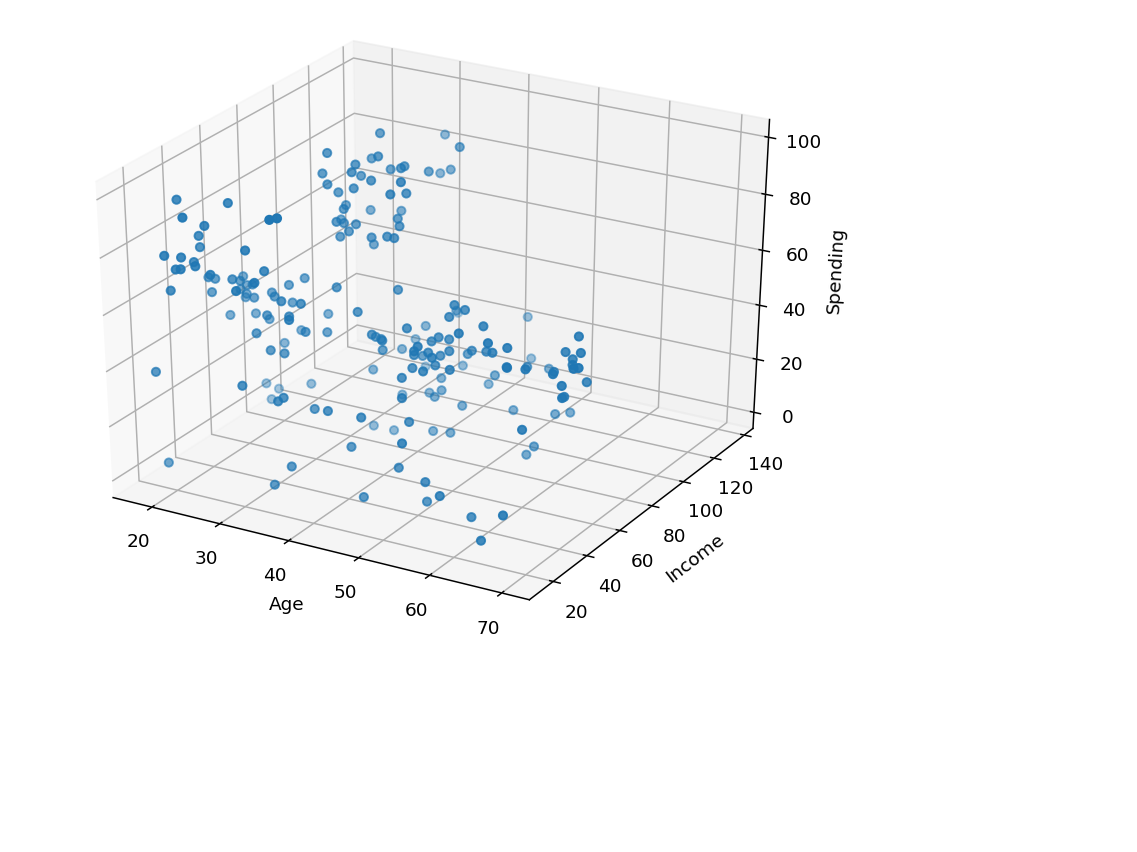

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Let's process the Gender to 0 and 1
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['Age'], df['Annual Income (k$)'],df['Spending Score (1-100)'])


ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
plt.show()

# II. Number of clusters: the elbow method

When doing clustering, there is one very important choice: the number of clusters!

To choose the optimal number of clusters, there is an empirical method: the **elbow method**.

The idea is to perform a k-means for a given number k (number of clusters), and then compute the inertia (sum of the distance of the samples to their cluster center).

Then you plot this inertie as a function of k, and choose the optimal k where you can see an elbow.

Let's apply it now:

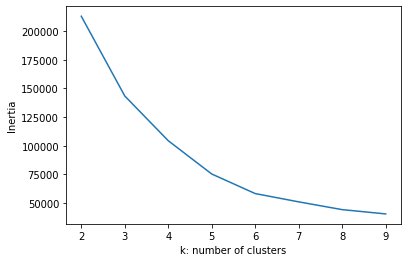

In [4]:
%matplotlib inline
from sklearn.cluster import KMeans

inertias = []
X = df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

for k in range(2, 10):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 10), inertias)
plt.xlabel("k: number of clusters")
plt.ylabel("Inertia")
plt.show()

What optimal k would you choose? For this example, let's choose `k=5`.

# III. Model interpretation

We can now make a vizualization of the data with clusters:

<IPython.core.display.Javascript object>


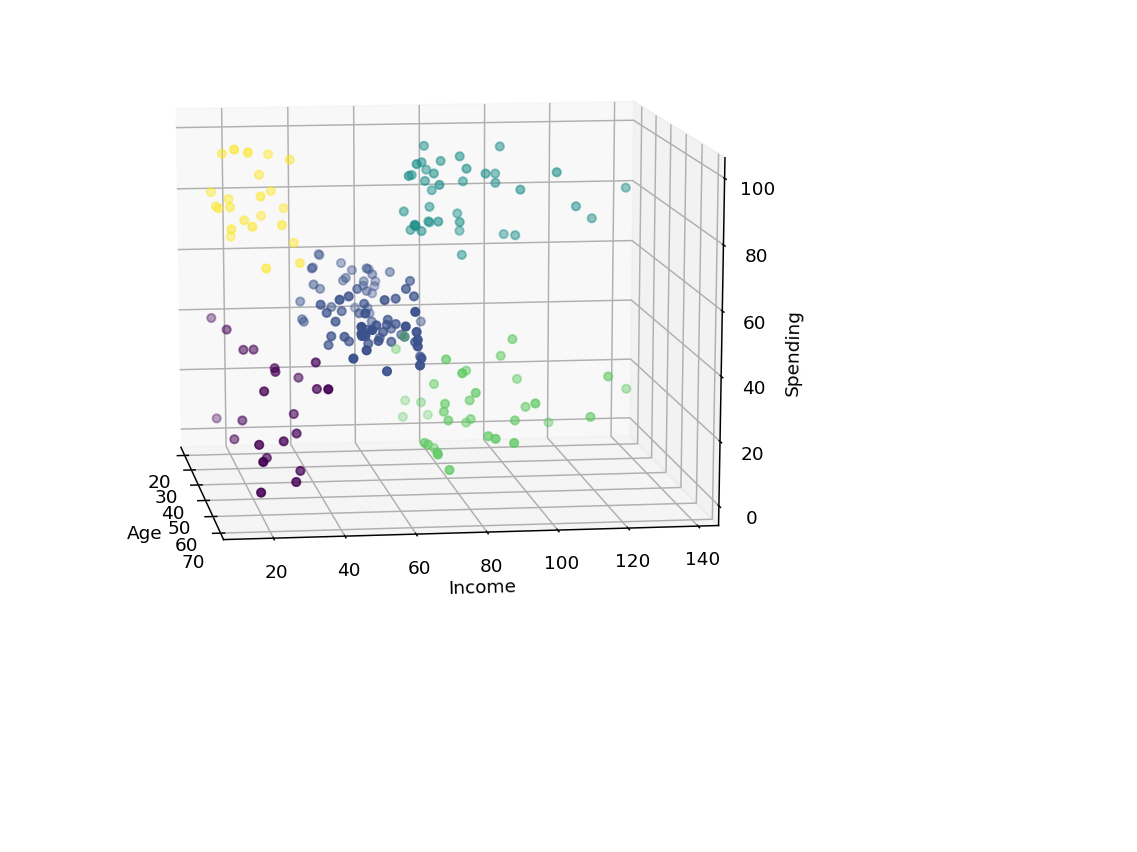

In [6]:
%matplotlib notebook

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['Age'], df['Annual Income (k$)'],df['Spending Score (1-100)'], c=kmeans.labels_)


ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
plt.show()

We can now give an interpretation of the clusters:
- Yellow: low income, high spending, young people
- Purple: low income, low spending people
- Blue: mid income, mid spending people
- Dark green: high income, high spending, young people
- Light green: high income, low spending, young people

What would be yours? According to that, what people would you target with ads?

## Clustering: other methods

There are many more algorithms to perform clustering, we only saw the most common one: k-means.

One can have a look at the very good [scikit-learn webpage on clustering](https://scikit-learn.org/stable/modules/clustering.html) for more details.

# IV. Image Compression

Using clustering, let's see how we can perform image compression of the image `NewYork.jpg`, keeping only 4 colors for example.

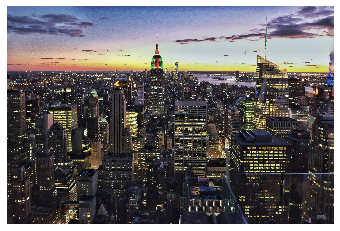

In [11]:
# Let's display the image
%matplotlib inline
img = plt.imread('NewYork.jpg')
plt.axis('off')
plt.imshow(img)

In [12]:
# Let's apply clustering to the image, using color as 3 features: RGB
flat_img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
flat_img.shape

(15980544, 3)

We now have a dataset with 15980544 samples (the number of pixels), and 3 features: RGB.

We can apply clustering on it:

In [13]:
km = KMeans(n_clusters=4)
km.fit(flat_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Let's have a look at:
- the `.cluster_centers_`: they are the colors we will keep
- the `.labels_`: they are the color for each pixel

In [14]:
km.cluster_centers_

array([[ 31.43224439,  29.11711058,  32.9161037 ],
       [202.63828943, 200.19351334, 183.57201314],
       [136.2603043 , 133.04490775, 152.81480399],
       [ 82.77056378,  74.37454667,  75.15345055]])

So we just have to apply the closest cluster center to each pixel:

In [15]:
comp_img_flat = km.cluster_centers_[km.labels_]
comp_img_flat.shape

(15980544, 3)

And so finally, the compressed image:

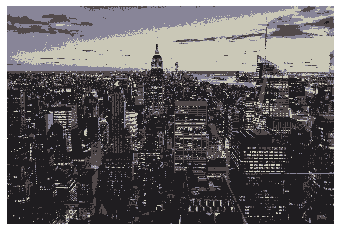

In [17]:
comp_img = comp_img_flat.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.axis('off')
plt.imshow(comp_img/255)